# Inertrope model inference

Inertrope is a machine learning–driven multiclass framework designed to classify patient data from Isothermal Titration Calorimetry (ITC) and Spectroscopic measurements into Healthy, Benign, and Cancer classes. It integrates systematic normalization, feature engineering, and advanced classification modeling to provide a robust, interpretable, and scalable platform for clinical diagnostics.

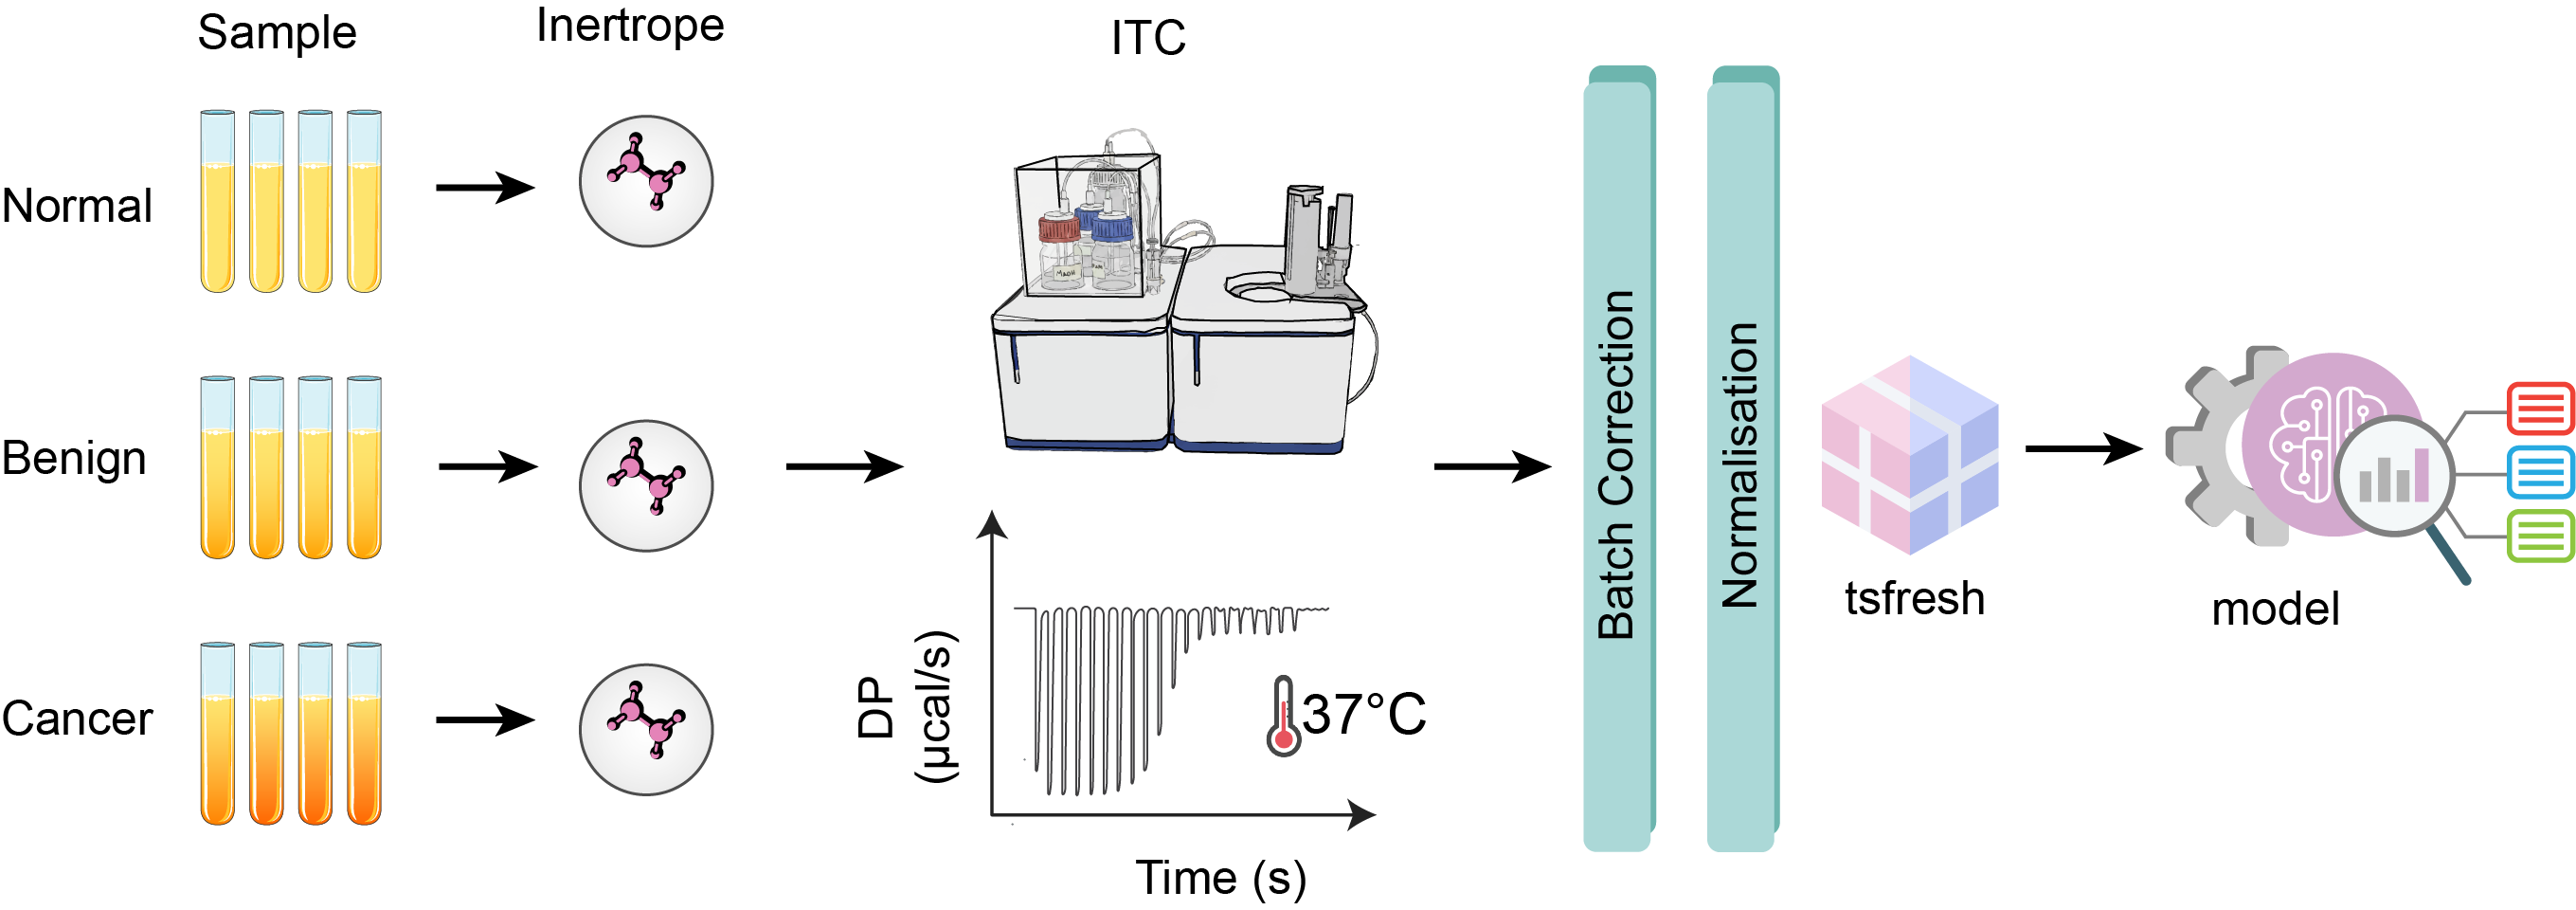

In [1]:
from Inertrope import inertrope

## Configure the Model

In [2]:
inertrope.configure_models(
    itc_model_path="final_extratrees_itc.joblib",
    combined_model_path="final_extratrees_combined.joblib"
)


[CONFIG] ITC model path set to: final_extratrees_itc.joblib
[CONFIG] Combined model path set to: final_extratrees_combined.joblib


## Patient Clinacal status prediction (Healthy, Benign, Cancer)

### Prediction with Multiclass ExtraTrees Classifier trained on Isothermal Calorimetry Data (DP ucal/sec) of plasma samples of Healthy, Benign and Cancer patient cohort

In [3]:

results = inertrope.pred_itc("/storage/savi/saveenas/Projects/Inertropy/Final_Innertropy_Deliverables/Python_Package/Inertrope/ITC_data_normalized.csv", out_csv="itc_prediction.csv")
print(results.head())

[INFO] Running inertrope.pred_itc (time-series only)
[INFO] Detected sample identifier column: 'Sample'
[INFO] Converted to long-format: (1094634, 3)


Feature Extraction: 100%|██████████| 48/48 [04:18<00:00,  5.38s/it]
/home/saveenas/miniconda3/envs/Magnet/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


[INFO] tsfresh features extracted: (522, 783)
[INFO] Model loaded from final_extratrees_itc.joblib
[INFO] Aligning features...
[INFO] Using 135 aligned features for prediction.
[SUCCESS] Predictions complete for 522 samples.
[DONE] inertrope.pred_itc results saved → itc_prediction.csv
  Sample_ID Predicted_Status  Prob_Healthy  Prob_Benign  Prob_Cancer
0    PB10_1           Benign           0.0          1.0          0.0
1    PB10_2           Benign           0.0          1.0          0.0
2    PB10_3           Benign           0.0          1.0          0.0
3    PB11_1           Benign           0.0          1.0          0.0
4    PB11_2           Benign           0.0          1.0          0.0


In [4]:
results

,Sample_ID,Predicted_Status,Prob_Healthy,Prob_Benign,Prob_Cancer
0,PB10_1,Benign,0.0,1.0,0.0
1,PB10_2,Benign,0.0,1.0,0.0
2,PB10_3,Benign,0.0,1.0,0.0
3,PB11_1,Benign,0.0,1.0,0.0
4,PB11_2,Benign,0.0,1.0,0.0
...,...,...,...,...,...
517,PN8_2,Healthy,1.0,0.0,0.0
518,PN8_3,Healthy,1.0,0.0,0.0
519,PN9_1,Healthy,1.0,0.0,0.0
520,PN9_2,Healthy,1.0,0.0,0.0


### Prediction with Multiclass ExtraTrees Classifier trained on Isothermal Calorimetry Data (DP ucal/sec) and UV-Visible Wavelength (200-900 nm) Absorbance data of plasma samples obtained from Healthy, Benign and Cancer patients cohort

In [5]:
results_combined = inertrope.pred_combined("combined_data.csv", out_csv="itc_wavelength_prediction.csv")
print(results_combined.head())

[INFO] Running inertrope.pred_combined (time + static)
[INFO] Detected sample identifier column: 'Sample'
[INFO] Converted to long-format: (1094634, 3)


Feature Extraction: 100%|██████████| 48/48 [04:24<00:00,  5.50s/it]
/home/saveenas/miniconda3/envs/Magnet/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


[INFO] tsfresh features extracted: (522, 783)
[INFO] Model loaded from final_extratrees_combined.joblib
[INFO] Aligning features...
[INFO] Using 1484 aligned features for prediction.
[SUCCESS] Predictions complete for 522 samples.
[DONE] inertrope.pred_combined results saved → itc_wavelength_prediction.csv
  Sample_ID Predicted_Status  Prob_Healthy  Prob_Benign  Prob_Cancer
0    PB10_1           Benign           0.0          1.0          0.0
1    PB10_2           Benign           0.0          1.0          0.0
2    PB10_3           Benign           0.0          1.0          0.0
3    PB11_1           Benign           0.0          1.0          0.0
4    PB11_2           Benign           0.0          1.0          0.0


In [6]:
results_combined

,Sample_ID,Predicted_Status,Prob_Healthy,Prob_Benign,Prob_Cancer
0,PB10_1,Benign,0.000000,1.0,0.000000
1,PB10_2,Benign,0.000000,1.0,0.000000
2,PB10_3,Benign,0.000000,1.0,0.000000
3,PB11_1,Benign,0.000000,1.0,0.000000
4,PB11_2,Benign,0.000000,1.0,0.000000
...,...,...,...,...,...
517,PN8_2,Healthy,0.965000,0.0,0.035000
518,PN8_3,Healthy,0.940000,0.0,0.060000
519,PN9_1,Healthy,0.940000,0.0,0.060000
520,PN9_2,Healthy,0.966667,0.0,0.033333
